<h2>Instalação do tensorflow 1.13.2 CPU</h2><br>

<p>É necessário a instalação do tensorflow na versão 1.13.2, rode a celula abaixo para realizar a instalação.</p>

In [1]:
!pip install tensorflow==1.13.2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from datetime import datetime

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [3]:
tf.__version__

'1.13.2'

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1yyBRclo-fdum0wYx15XYNTBqE8qf5RAt'

fluff, id = link.split('=')

# Dataset Import
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Filename.csv')
dataframe = pd.read_csv('Filename.csv')


<h2>Informações sobre o Dataset</h2><br>
O dataset contem dados sobre o <b>aquecimento global</b>, com inicio em <b>1850</b> ate <b>2015</b>, com dados gerados todo dia primeiro de cada mês, ou seja, <b>12</b> amostras por ano.

<b>LandAverageTemperature</b>: temperatura média global da terra em graus Celsius<br>
<b>LandAverageTemperatureIncerteza</b>: o intervalo de confiança de 95% em torno da média<br>
<b>LandMaxTemperature</b>: temperatura máxima média global da terra em graus Celsius<br>
<b>Incerteza LandMaxTemperature</b>: o intervalo de confiança de 95% em torno da temperatura máxima da terra<br>
<b>LandMinTemperature</b>: temperatura mínima média global da terra em graus Celsius<br>
<b>Incerteza LandMinTemperature</b>: o intervalo de confiança de 95% em torno da temperatura mínima do solo<br>
<b>LandAndOceanAverageTemperature</b>: temperatura média global da terra e do oceano em graus Celsius<br>
<b>Incerteza LandAndOceanAverageTemperature</b>: o intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano

<h2>Objetivo</h2>

Será avaliado o <b>entendimento do dataset</b> e a <b>montagem do modelo</b>. Deverá ser veito uma regressão utilizando <b>LSTM</b> com <b>Tensorflow</b> versão (1.13.2), quem optar por utilizar <b>Keras</b> terá uma nota reduzida para <b>40%</b> do valor total. A escolha de qual classe a ser predita e quais features serão utilizadas para realizar a predição é de escolha de cada participante.<br>
<p><b>Obs.</b>: A forma de vizualização e explicação sobre o que foi predito será avaliado tambem.</p>

In [5]:
dataframe.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [6]:
dataframe.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [0]:
def get_year_and_month(Dataframe):
    date_list = dataframe["dt"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d")).to_list()
    date_list = [x.date().timetuple()[:2] for x in date_list]
    
    year_list, day_list = zip(*date_list)
    
    Dataframe["Year"] = year_list
    Dataframe["Month"] = day_list
    Dataframe = Dataframe.drop(["dt"], axis=1)
    
    return Dataframe

In [0]:
dataframe = get_year_and_month(dataframe)

In [0]:
from sklearn.preprocessing import MinMaxScaler



# Normalização dos valores do dataset original para melhor adequação do modelo
x = dataframe.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

dataframe = pd.DataFrame(x_scaled,
                         columns= [
                                   'LandAverageTemperature',
                                   'LandAverageTemperatureUncertainty',
                                   'LandMaxTemperature',
                                   'LandMaxTemperatureUncertainty',
                                   'LandMinTemperature',
                                   'LandMinTemperatureUncertainty',
                                   'LandAndOceanAverageTemperature',
                                   'LandAndOceanAverageTemperatureUncertainty',
                                   'Year',
                                   'Month'])

In [10]:
dataframe.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,0.541689,0.166435,0.548029,0.100666,0.538989,0.112033,0.533015,0.208511,0.500000,0.500000
std,0.282743,0.153655,0.279480,0.134720,0.274820,0.129116,0.248071,0.177318,0.290492,0.313902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267012,0.045096,0.279637,0.022638,0.269310,0.031856,0.306075,0.050602,0.248485,0.250000
50%,0.560187,0.134431,0.574578,0.048048,0.552605,0.067767,0.540498,0.192771,0.500000,0.500000
75%,0.826005,0.214849,0.813975,0.114345,0.805829,0.119679,0.763483,0.262651,0.751515,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
dataframe_treinamento = dataframe.loc[dataframe["Year"] < 0.75]

In [0]:
dataframe_teste = dataframe.loc[dataframe["Year"] >= 0.75]

<h2> Dataset </h2><br>
O dataset foi separado em dois dataframes, <b>dataframe_treinamento</b> e <b>dataframe_teste</b>, o dataframe de treinamento possui dados dos anos de <b>1850</b> a <b>1999</b>, o de teste vai de <b>2000</b> a <b>2015</b>. O dataframe de treinamento deverá ser divido entre treino e validação, com <b>70% para treino e 30% para validação</b>, e o dataframe de teste será feito para comparar os dados preditos com base na classe que foi escolhida.

<h2>Visualização dos dados</h2>

In [13]:
dataframe.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year,Month
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,0.541689,0.166435,0.548029,0.100666,0.538989,0.112033,0.533015,0.208511,0.500000,0.500000
std,0.282743,0.153655,0.279480,0.134720,0.274820,0.129116,0.248071,0.177318,0.290492,0.313902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267012,0.045096,0.279637,0.022638,0.269310,0.031856,0.306075,0.050602,0.248485,0.250000
50%,0.560187,0.134431,0.574578,0.048048,0.552605,0.067767,0.540498,0.192771,0.500000,0.500000
75%,0.826005,0.214849,0.813975,0.114345,0.805829,0.119679,0.763483,0.262651,0.751515,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 10 columns):
LandAverageTemperature                       1992 non-null float64
LandAverageTemperatureUncertainty            1992 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
Year                                         1992 non-null float64
Month                                        1992 non-null float64
dtypes: float64(10)
memory usage: 155.8 KB


In [0]:
import seaborn as sns

# sns.pairplot(dataframe_treinamento, diag_kind="kde")

A seguir, é exposta a matriz de correlação entre as variáveis do dataframe.

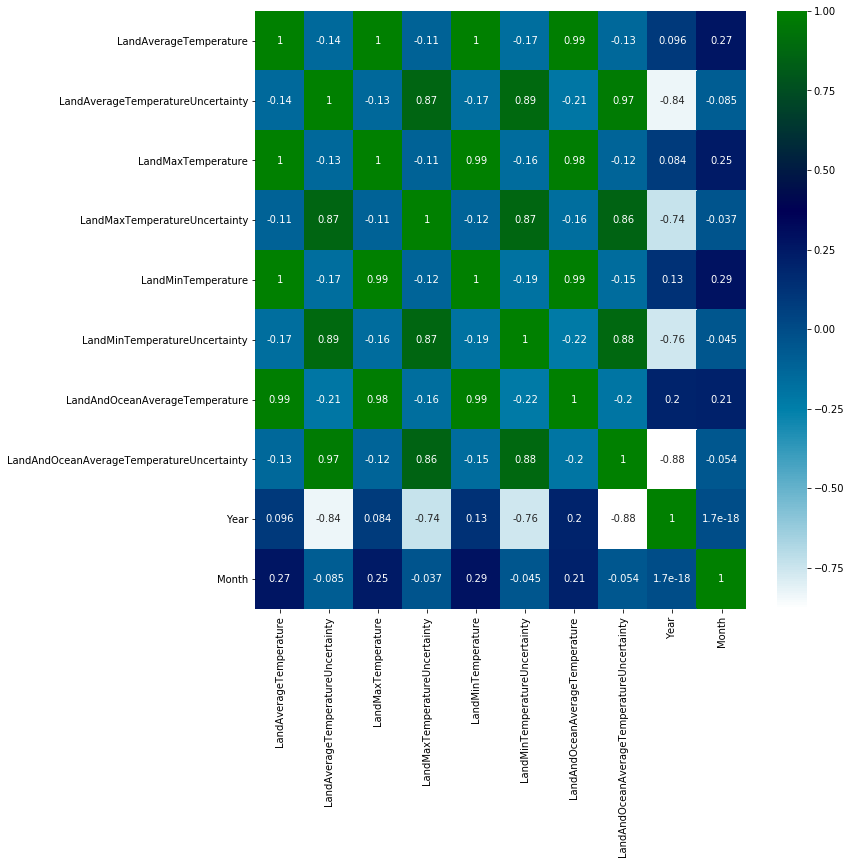

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
sns.heatmap(dataframe.corr(),annot=True,cmap='ocean_r',cbar=True)
plt.show()

O bloco de código a seguir é responsável pela criação dos dataframes de teste e de treino, bem como a indicação da label de interesse a ser prevista, a temperatura máxima em terra (LandMaxTemperature).

In [0]:
# Criação do conjunto de treino e de validação com a retirada dos valores de confinaça das medidas
X_train_df = dataframe_treinamento.drop([
                                        'LandMaxTemperature',
                                        'Month',
                                        'LandAverageTemperatureUncertainty',
                                        'LandMaxTemperatureUncertainty',
                                        'LandMinTemperatureUncertainty',
                                        'LandAndOceanAverageTemperatureUncertainty'], axis=1)
Y_train_df = dataframe_treinamento['LandMaxTemperature']

x_test_df = dataframe_teste.drop([
                                    'LandMaxTemperature',
                                    'Month',
                                    'LandAverageTemperatureUncertainty',
                                    'LandMaxTemperatureUncertainty',
                                    'LandMinTemperatureUncertainty',
                                    'LandAndOceanAverageTemperatureUncertainty'], axis=1)
y_test_df = dataframe_teste['LandMaxTemperature']

In [0]:
from sklearn.model_selection import train_test_split

# Separação do dataframe_treinamento em treino e teste sem shuffle, para os dados se manterem organizados durante o treinamento
X_train, x_test, Y_train, y_test = train_test_split(X_train_df, Y_train_df, test_size=0.3, shuffle=False)

In [19]:
X_train.head()

,LandAverageTemperature,LandMinTemperature,LandAndOceanAverageTemperature,Year
0,0.022881,0.145550,0.069704,0.0
1,0.176880,0.206057,0.216706,0.0
2,0.301764,0.231583,0.305296,0.0
3,0.451850,0.424878,0.426791,0.0
4,0.636689,0.609575,0.590343,0.0


## Modelo

In [0]:
# Reset do tf para o default
tf.reset_default_graph()

# Parâmetros para o modelo a ser utilizado
epochs = 500
n_classes = 1
n_units = 64
n_features = X_train.shape[1]
batch_size = 64

In [0]:
# 
xplaceholder= tf.placeholder(tf.float32, [None, n_features])
yplaceholder = tf.placeholder(tf.float32)

In [22]:
# definição dos pesos e dos bias iniciais a serem utilizados no modelo já no shape do modelo
weights = tf.Variable(tf.random_normal([n_units, n_classes], stddev=0.2), name="weights")
biases = tf.Variable(tf.random_normal([1], stddev=0.2), name="biases")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Criação da camada de input do modelo
rnn_input = tf.split(xplaceholder, n_features, 1)

In [24]:
from tensorflow.contrib import rnn

# Criação das camadas LSTM
cell = rnn.MultiRNNCell([rnn.BasicLSTMCell(n_units),rnn.BasicLSTMCell(n_units)])

# Definição inicial dos valores operacionais do modelo
outputs, state = rnn.static_rnn(cell, rnn_input, dtype=tf.float32)
output = tf.matmul(outputs[-1], weights) + biases

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


In [0]:
# Criação do logit a partir da operação de entre o input nas camadas do modelo
logit = tf.reshape(output, [-1])

In [26]:
# Definição da operação de loss e da operação do treinamento com otimizador Adam
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=yplaceholder))
train_op = tf.train.AdamOptimizer().minimize(loss_op)

Instructions for updating:
Use tf.cast instead.


In [27]:
from sklearn.metrics import mean_squared_error


losses = []
val_losses = []
error = []

# Treino do modelo
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()

    for epoch in range(epochs + 1):
        loss = 0

        i = 0
        for i in range(int(len(X_train) / batch_size)):

            start = i
            end = i + batch_size

            batch_x = np.array(X_train[start:end])
            batch_y = np.array(Y_train[start:end])
            
            # fit do modelo e obtenção do erro com sua otimização
            _, loss = sess.run([train_op, loss_op], feed_dict={xplaceholder: batch_x, yplaceholder: batch_y})
            losses.append(loss)
            # utilização do dataset de teste e obtenção de seu erro
            _, loss = sess.run([train_op, loss_op], feed_dict={xplaceholder: x_test, yplaceholder: y_test})
            val_losses.append(loss)

            i += batch_size
        
        print('Epoch', epoch, 'completed out of', epochs, 'loss:', loss)

    # Obtenção dos valores de predição do modelo para o conjunto de treino, teste e validação
    pred_train = tf.nn.sigmoid(logit).eval({xplaceholder: np.array(X_train), yplaceholder: np.array(Y_train)})
    pred_test = tf.nn.sigmoid(logit).eval({xplaceholder: np.array(x_test), yplaceholder: np.array(y_test)})
    pred_val = tf.nn.sigmoid(logit).eval({xplaceholder: np.array(x_test_df), yplaceholder: np.array(y_test_df)})

Epoch 0 completed out of 500 loss: 0.577148
Epoch 1 completed out of 500 loss: 0.5211874
Epoch 2 completed out of 500 loss: 0.5204717
Epoch 3 completed out of 500 loss: 0.52071124
Epoch 4 completed out of 500 loss: 0.52062076
Epoch 5 completed out of 500 loss: 0.5205798
Epoch 6 completed out of 500 loss: 0.5205437
Epoch 7 completed out of 500 loss: 0.5204946
Epoch 8 completed out of 500 loss: 0.5204314
Epoch 9 completed out of 500 loss: 0.52035165
Epoch 10 completed out of 500 loss: 0.52025276
Epoch 11 completed out of 500 loss: 0.5201327
Epoch 12 completed out of 500 loss: 0.51999116
Epoch 13 completed out of 500 loss: 0.51983166
Epoch 14 completed out of 500 loss: 0.51966363
Epoch 15 completed out of 500 loss: 0.5195001
Epoch 16 completed out of 500 loss: 0.51935285
Epoch 17 completed out of 500 loss: 0.5192294
Epoch 18 completed out of 500 loss: 0.5191311
Epoch 19 completed out of 500 loss: 0.5190549
Epoch 20 completed out of 500 loss: 0.5189961
Epoch 21 completed out of 500 loss: 0

# Métricas

A seguir, é feito o plot da evolução do valor do erro tanto para o treino quanto para o teste ao longo das épocas de treino do modelo. Nela, verifica-se o decaimento de seu valor ao longo das épocas. 

In [28]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=[i for i in range(len(losses))], y=losses,
                    mode='lines',
                    name='loss'))
fig.add_trace(go.Scatter(x=[i for i in range(len(val_losses))], y=val_losses,
                    mode='lines',
                    name='validation loss'))

A seguir, é exposto os valores das labels do dataset original junto com as previsões realizadas pelo modelo para o conjunto de treino, teste e para o conjunto de validação, que não foi utilizado ao longo do treino.

### Predições do Conjunto de Treino

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=[i for i in range(len(Y_train))], y=Y_train.values,
                    mode='lines+markers',
                    name='y train'))
fig.add_trace(go.Scatter(x=[i for i in range(len(pred_train))], y=pred_train,
                    mode='lines+markers',
                    name='predicted'))

#### Predições do Conjunto de Treino dos primeiros 100 itens

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=[i for i in range(len(Y_train[:100]))], y=Y_train.values[:100],
                    mode='lines+markers',
                    name='y train'))
fig.add_trace(go.Scatter(x=[i for i in range(len(pred_train[:100]))], y=pred_train[:100],
                    mode='lines+markers',
                    name='predicted'))


### Predições do Conjunto de Teste

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=[i for i in range(len(y_test))], y=y_test.values,
                    mode='lines+markers',
                    name='y test'))
fig.add_trace(go.Scatter(x=[i for i in range(len(pred_test))], y=pred_test,
                    mode='lines+markers',
                    name='predicted'))

fig.show()

### Predições do Conjunto de Validação

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=[i for i in range(len(y_test_df))], y=y_test_df.values,
                    mode='lines+markers',
                    name='y validation'))
fig.add_trace(go.Scatter(x=[i for i in range(len(pred_val))], y=pred_val,
                    mode='lines+markers',
                    name='predicted'))

## Conclusão


Os resultados obtidos se mostram favoráveis. O valor para o loss foi pequeno e houve proximidade entre os valores previstos e os valores reais para o conjunto de validação, sendo ele de anos superiores a 2000 e que nunca passaram pelo treinamento do modelo resultante.